<a href="https://colab.research.google.com/github/vinay10949/AnalyticsAndML/blob/master/3_3_Gaussian_transformation_feature_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gaussian Transformation with Feature-Engine

Scikit-learn has recently released transformers to do Gaussian mappings as they call the variable transformations. The PowerTransformer allows to do Box-Cox and Yeo-Johnson transformation. With the FunctionTransformer, we can specify any function we want.

The transformers per se, do not allow to select columns, but we can do so using a third transformer, the ColumnTransformer

Another thing to keep in mind is that Scikit-learn transformers return NumPy arrays, and not dataframes, so we need to be mindful of the order of the columns not to mess up with our features.

## Important

Box-Cox and Yeo-Johnson transformations need to learn their parameters from the data. Therefore, as always, before attempting any transformation it is important to divide the dataset into train and test set.


In [2]:
!pip install feature_engine

  Created wheel for numpydoc: filename=numpydoc-0.9.2-cp36-none-any.whl size=31893 sha256=27dd148301d2b916e5cbe67405186a5eb54048540ec50a0217992e0ba92b433c
  Stored in directory: /root/.cache/pip/wheels/96/f3/52/25c8e1f40637661d27feebc61dae16b84c7cdd93b8bc3d7486
Successfully built numpydoc


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

from feature_engine import variable_transformers as vt

In [4]:
data = pd.read_csv('houseprice_train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Plots to assess normality

To visualise the distribution of the variables, we plot a histogram and a Q-Q plot. In the Q-Q pLots, if the variable is normally distributed, the values of the variable should fall in a 45 degree line when plotted against the theoretical quantiles. We discussed this extensively in Section 3 of this course.

In [0]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

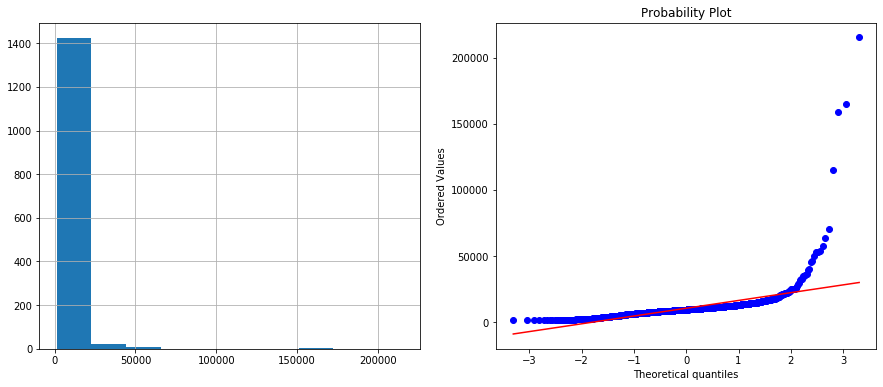

In [6]:
diagnostic_plots(data, 'LotArea')

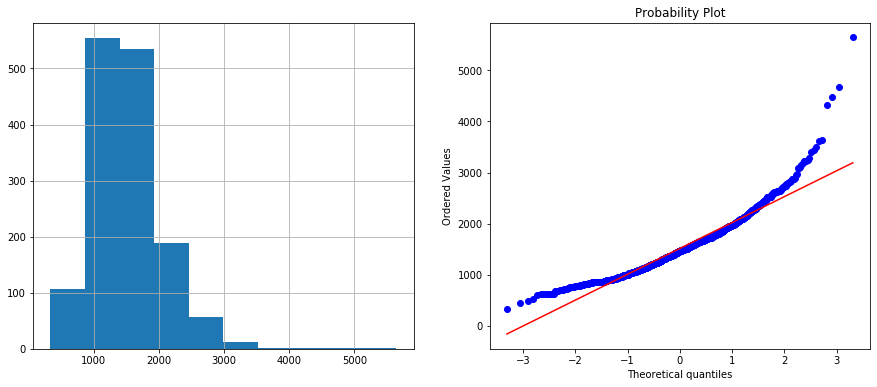

In [7]:
diagnostic_plots(data, 'GrLivArea')

## LogTransformer

In [8]:
lt = vt.LogTransformer(variables = ['LotArea', 'GrLivArea'])
lt.fit(data)

LogTransformer(variables=['LotArea', 'GrLivArea'])

In [9]:
# variables that will be transformed
lt.variables

['LotArea', 'GrLivArea']

In [0]:
data_tf = lt.transform(data)

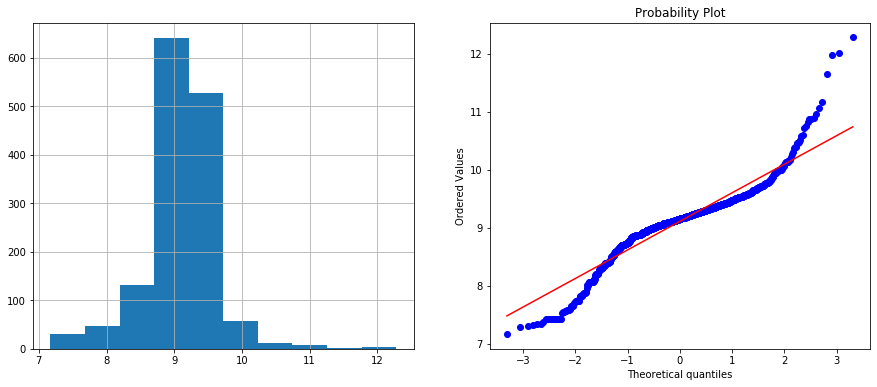

In [11]:
diagnostic_plots(data_tf, 'LotArea')

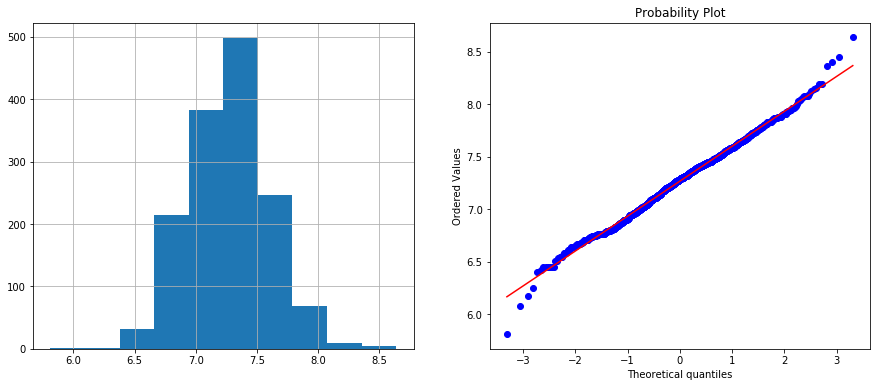

In [0]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')

## ReciprocalTransformer

In [12]:
rt = vt.ReciprocalTransformer(variables = ['LotArea', 'GrLivArea'])
rt.fit(data)

ReciprocalTransformer(variables=['LotArea', 'GrLivArea'])

In [0]:
data_tf = rt.transform(data)

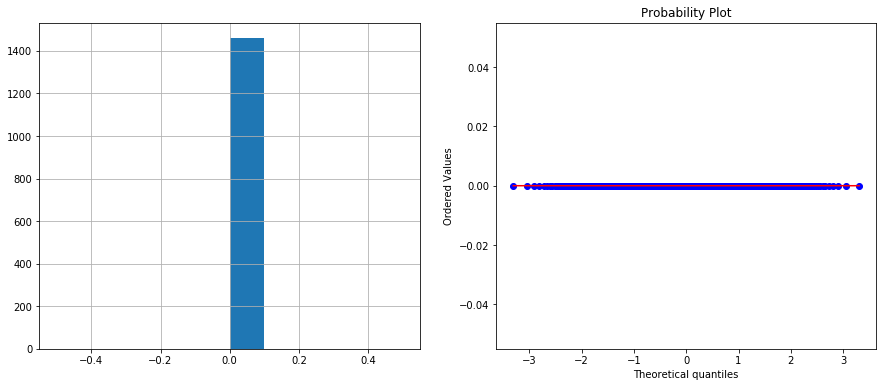

In [14]:
diagnostic_plots(data_tf, 'LotArea')

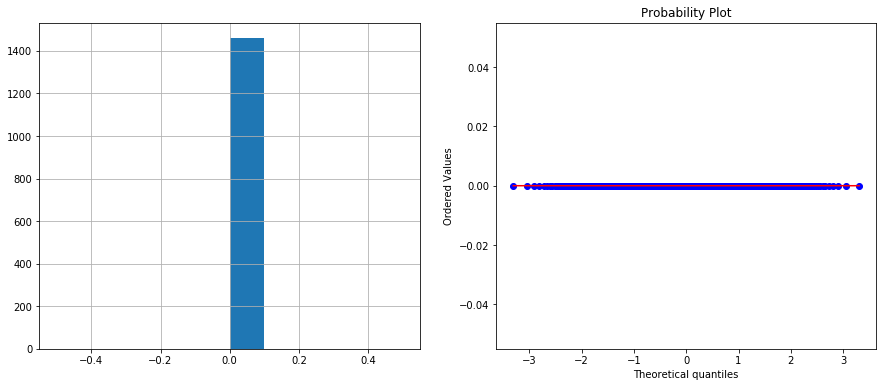

In [15]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')

## ExponentialTransformer

In [17]:
et = vt.PowerTransformer(variables = ['LotArea', 'GrLivArea'])
et.fit(data)

PowerTransformer(exp=0.5, variables=['LotArea', 'GrLivArea'])

In [0]:
data_tf = et.transform(data)

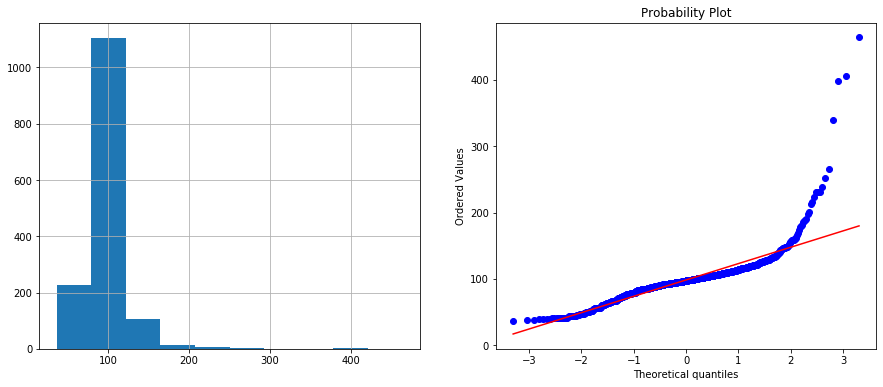

In [19]:
diagnostic_plots(data_tf, 'LotArea')

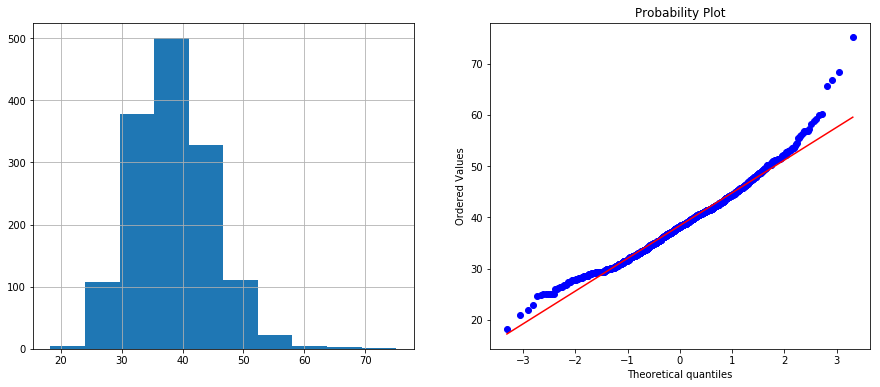

In [0]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')

## BoxCoxTransformer

In [24]:
bct = vt.BoxCoxTransformer(variables = ['LotArea', 'GrLivArea'])
bct.fit(data)

BoxCoxTransformer(variables=['LotArea', 'GrLivArea'])

In [26]:
# these are the exponents for the BoxCox transformation
bct.lambda_dict_

{'GrLivArea': 0.006304841218621503, 'LotArea': 0.03094631071248529}

In [0]:
data_tf = bct.transform(data)

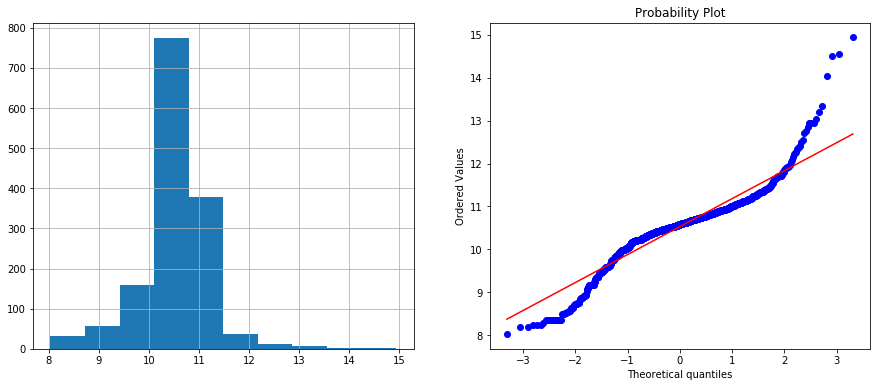

In [28]:
diagnostic_plots(data_tf, 'LotArea')

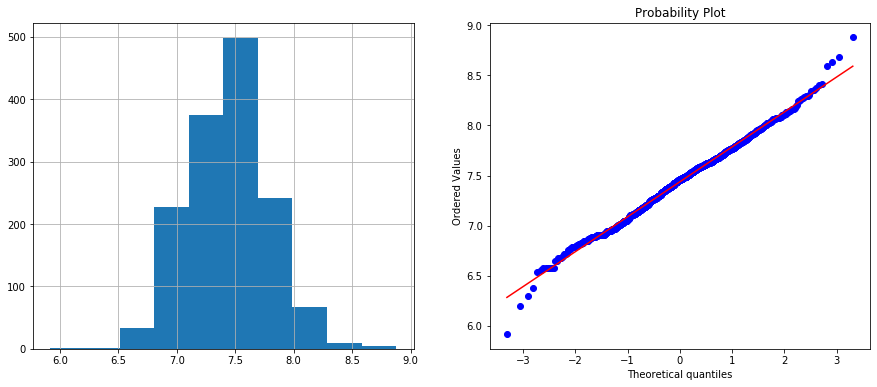

In [29]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')

## Yeo-Johnson Transformer

Yeo-Johnson Transformer will be available in the next release of Feauture-Engine!!!

In [30]:
yjt = vt.YeoJohnsonTransformer(variables = ['LotArea', 'GrLivArea'])
yjt.fit(data)

YeoJohnsonTransformer(variables=['LotArea', 'GrLivArea'])

In [32]:
# these are the exponents for the Yeo-Johnson transformation
yjt.lambda_dict_

{'GrLivArea': 0.005539641278705955, 'LotArea': 0.03081854079393649}

In [0]:
data_tf = yjt.transform(data)

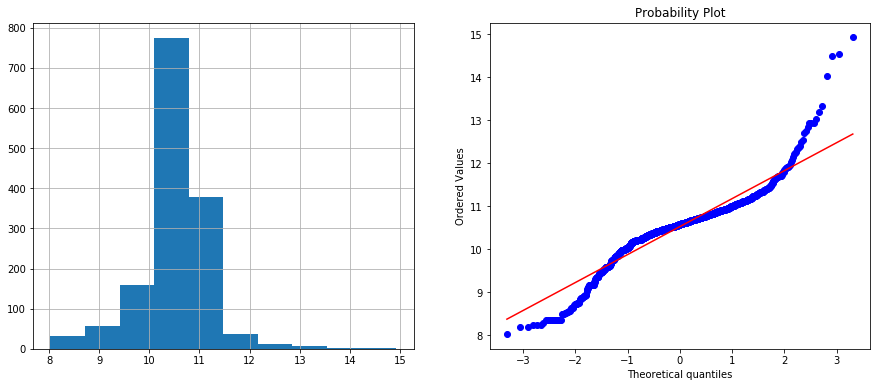

In [34]:
diagnostic_plots(data_tf, 'LotArea')

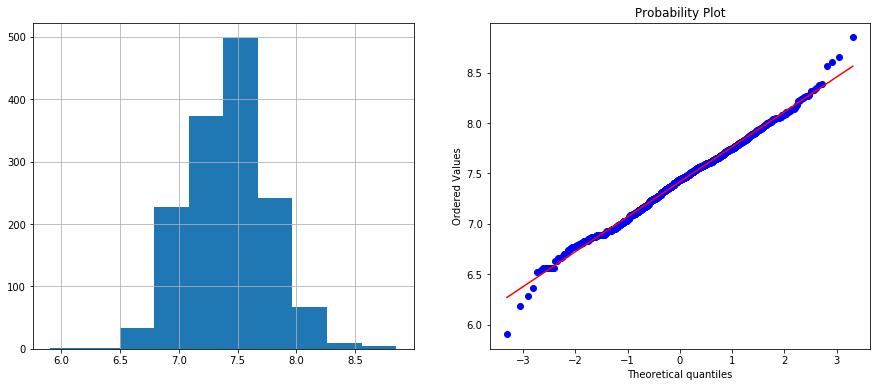

In [35]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')